In [110]:
# Mirar este -> https://colab.research.google.com/drive/1DQc8a-WOTctenvoy5T0lWUXn47EuteCy?usp=sharing#scrollTo=BtEYnFkNyN_s
import pandas as pd
from PIL import Image
import pandas as pd
import os

carpeta = 'spirals/spiral/training'

# Lista para almacenar las rutas de los archivos
rutas_archivos = []

# Obtener la lista de archivos en la carpeta
for root, dirs, files in os.walk(carpeta):
    for file in files:
        # Añadir la ruta completa del archivo a la lista
        ruta_completa = os.path.join(root, file)
        rutas_archivos.append(ruta_completa)

# Crear un DataFrame de ejemplo con rutas de imágenes
data = {'imagen': rutas_archivos}
df = pd.DataFrame(data)

# Función para obtener la carpeta de una ruta
def obtener_carpeta(ruta):
    return os.path.dirname(ruta)

# Agregar una columna 'carpeta' al DataFrame
df['carpeta'] = df['imagen'].apply(obtener_carpeta)

df['carpeta'] = df['carpeta'].map({'spirals/spiral/training\healthy': 0, 'spirals/spiral/training\parkinson': 1})
# Mostrar el DataFrame resultante
print(df)

                                           imagen  carpeta
0     spirals/spiral/training\healthy\V01HE02.png        0
1     spirals/spiral/training\healthy\V01HE03.png        0
2     spirals/spiral/training\healthy\V02HE02.png        0
3     spirals/spiral/training\healthy\V02HE03.png        0
4      spirals/spiral/training\healthy\V03HE2.png        0
..                                            ...      ...
67  spirals/spiral/training\parkinson\V13PE03.png        1
68  spirals/spiral/training\parkinson\V14PE01.png        1
69  spirals/spiral/training\parkinson\V14PE02.png        1
70  spirals/spiral/training\parkinson\V15PE02.png        1
71  spirals/spiral/training\parkinson\V15PE03.png        1

[72 rows x 2 columns]


In [111]:
X = df['imagen']
y = df['carpeta']
X

0       spirals/spiral/training\healthy\V01HE02.png
1       spirals/spiral/training\healthy\V01HE03.png
2       spirals/spiral/training\healthy\V02HE02.png
3       spirals/spiral/training\healthy\V02HE03.png
4        spirals/spiral/training\healthy\V03HE2.png
                          ...                      
67    spirals/spiral/training\parkinson\V13PE03.png
68    spirals/spiral/training\parkinson\V14PE01.png
69    spirals/spiral/training\parkinson\V14PE02.png
70    spirals/spiral/training\parkinson\V15PE02.png
71    spirals/spiral/training\parkinson\V15PE03.png
Name: imagen, Length: 72, dtype: object

In [112]:
import os
from PIL import Image
import pandas as pd
import numpy as np

# Directorio principal que contiene la carpeta 'training'
directorio_principal = 'spirals/spiral/training'

# Lista para almacenar tuplas de la forma (bits_normalizados, etiqueta)
datos = []

# Función para convertir una imagen a bits
def image_to_bits(image):
    # Convertir la imagen a escala de grises y redimensionar a (28, 28)
    img_gray = image.convert('L').resize((100, 100))

    # Obtener los datos de píxeles como una matriz de numpy
    bits_numericos = np.array(img_gray, dtype=np.float32) / 255.0  # Normalizar los valores de píxeles

    return bits_numericos

# Crear un DataFrame con las rutas de las imágenes y sus etiquetas
rutas_imagenes = []
etiquetas = []

for root, dirs, files in os.walk(directorio_principal):
    for file in files:
        if file.endswith(".png") or file.endswith(".jpg"):
            ruta_imagen = os.path.join(root, file)
            etiqueta = 1 if "parkinson" in root else 0  # Asignar 1 a parkinson, 0 a healthy
            rutas_imagenes.append(ruta_imagen)
            etiquetas.append(etiqueta)

df = pd.DataFrame({'imagen': rutas_imagenes, 'etiqueta': etiquetas})

# Cargar imágenes y etiquetas
for _, row in df.iterrows():
    try:
        imagen = Image.open(row['imagen'])
        bits_numericos = image_to_bits(imagen)

        datos.append((bits_numericos, row['etiqueta']))
        
    except Exception as e:
        print(f"Error al abrir la imagen {row['imagen']}: {e}")

# Asegurarse de que todas las imágenes tengan la misma longitud máxima
max_length = max(len(bits) for bits, _ in datos)

# Inicializar X con ceros
X = np.zeros((len(datos), max_length, 100, 1), dtype=np.float32)

# Copiar los bits en X
for i, (bits, _) in enumerate(datos):
    np.copyto(X[i, :len(bits), :, 0], bits)

# Mostrar la forma de X
print(X.shape)


(72, 100, 100, 1)


In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

modeloDenso = Sequential([
    Flatten(input_shape=(100, 100, 1)),
    Dense(150, activation='relu'),
    Dense(1, activation='sigmoid')
])
modeloCNN = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

modeloCNN2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D(2, 2),
    
    Dropout(0.5),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [114]:
modeloDenso.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN2.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [115]:
modeloCNN.fit(X, y, batch_size=10, validation_split=0.2, epochs=100)

Epoch 1/100
6/6 [==============================] - 4s 199ms/step - loss: 1.2159 - accuracy: 0.4386 - val_loss: 0.6077 - val_accuracy: 1.0000
Epoch 2/100
6/6 [==============================] - 1s 108ms/step - loss: 0.6816 - accuracy: 0.5965 - val_loss: 0.9001 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 1s 106ms/step - loss: 0.6569 - accuracy: 0.6316 - val_loss: 1.1188 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 1s 106ms/step - loss: 0.6649 - accuracy: 0.6316 - val_loss: 1.1050 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 1s 102ms/step - loss: 0.6700 - accuracy: 0.6316 - val_loss: 0.9863 - val_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 1s 105ms/step - loss: 0.6698 - accuracy: 0.6316 - val_loss: 1.0979 - val_accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 1s 106ms/step - loss: 0.6520 - accuracy: 0.6316 - val_loss: 0.8972 - val_accuracy: 

6/6 [==============================] - 1s 99ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 2.6214 - val_accuracy: 0.4667
Epoch 59/100
6/6 [==============================] - 1s 107ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 2.2713 - val_accuracy: 0.5333
Epoch 60/100
6/6 [==============================] - 1s 98ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 2.5706 - val_accuracy: 0.5333
Epoch 61/100
6/6 [==============================] - 1s 112ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 2.4583 - val_accuracy: 0.5333
Epoch 62/100
6/6 [==============================] - 1s 103ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 2.4774 - val_accuracy: 0.5333
Epoch 63/100
6/6 [==============================] - 1s 110ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 2.7386 - val_accuracy: 0.4667
Epoch 64/100
6/6 [==============================] - 1s 110ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 2.5185 - val_accuracy: 0.5333
Epoch 65/100
6/6 [===

In [91]:
modeloCNN2.fit(X, y, batch_size=10, validation_split=0.2, epochs=100)

Epoch 1/100
6/6 [==============================] - 4s 224ms/step - loss: 1.0488 - accuracy: 0.5088 - val_loss: 1.1697 - val_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 1s 113ms/step - loss: 0.6698 - accuracy: 0.6316 - val_loss: 0.7627 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 1s 121ms/step - loss: 0.6814 - accuracy: 0.6316 - val_loss: 0.7614 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 1s 114ms/step - loss: 0.6781 - accuracy: 0.6316 - val_loss: 0.8502 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 1s 112ms/step - loss: 0.6610 - accuracy: 0.6316 - val_loss: 0.9744 - val_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 1s 115ms/step - loss: 0.6736 - accuracy: 0.6316 - val_loss: 0.9595 - val_accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 1s 108ms/step - loss: 0.6536 - accuracy: 0.6316 - val_loss: 1.0170 - val_accura

6/6 [==============================] - 1s 109ms/step - loss: 9.2623e-04 - accuracy: 1.0000 - val_loss: 4.2562 - val_accuracy: 0.4000
Epoch 59/100
6/6 [==============================] - 1s 107ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 4.0680 - val_accuracy: 0.4000
Epoch 60/100
6/6 [==============================] - 1s 110ms/step - loss: 8.5468e-04 - accuracy: 1.0000 - val_loss: 3.9709 - val_accuracy: 0.4000
Epoch 61/100
6/6 [==============================] - 1s 109ms/step - loss: 8.5980e-04 - accuracy: 1.0000 - val_loss: 3.7637 - val_accuracy: 0.4000
Epoch 62/100
6/6 [==============================] - 1s 107ms/step - loss: 7.7148e-04 - accuracy: 1.0000 - val_loss: 3.8457 - val_accuracy: 0.4000
Epoch 63/100
6/6 [==============================] - 1s 104ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.1314 - val_accuracy: 0.4000
Epoch 64/100
6/6 [==============================] - 1s 113ms/step - loss: 7.4908e-04 - accuracy: 1.0000 - val_loss: 4.2578 - val_accuracy: 0.4000

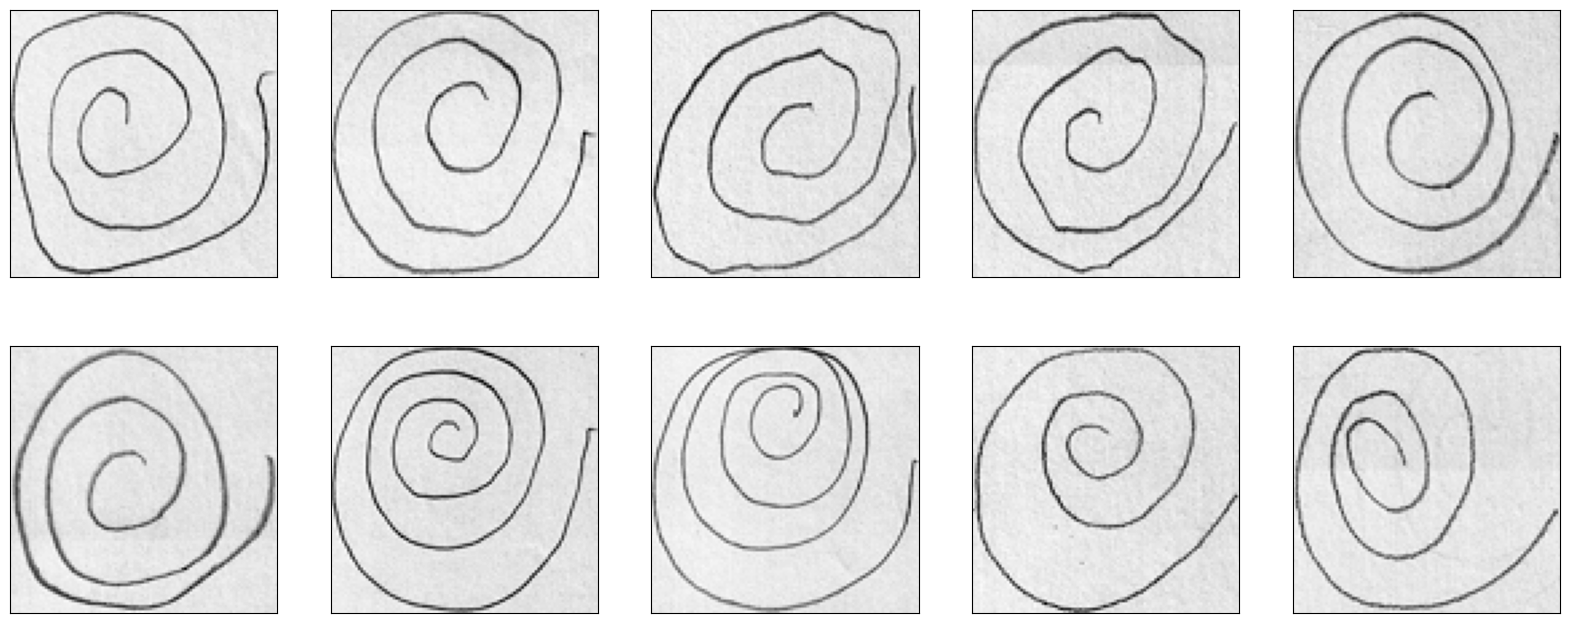

In [116]:
plt.figure(figsize=(20, 8))
for i in range(10):
    plt.subplot(2, 5, i +1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[i].reshape(100, 100), cmap='gray')

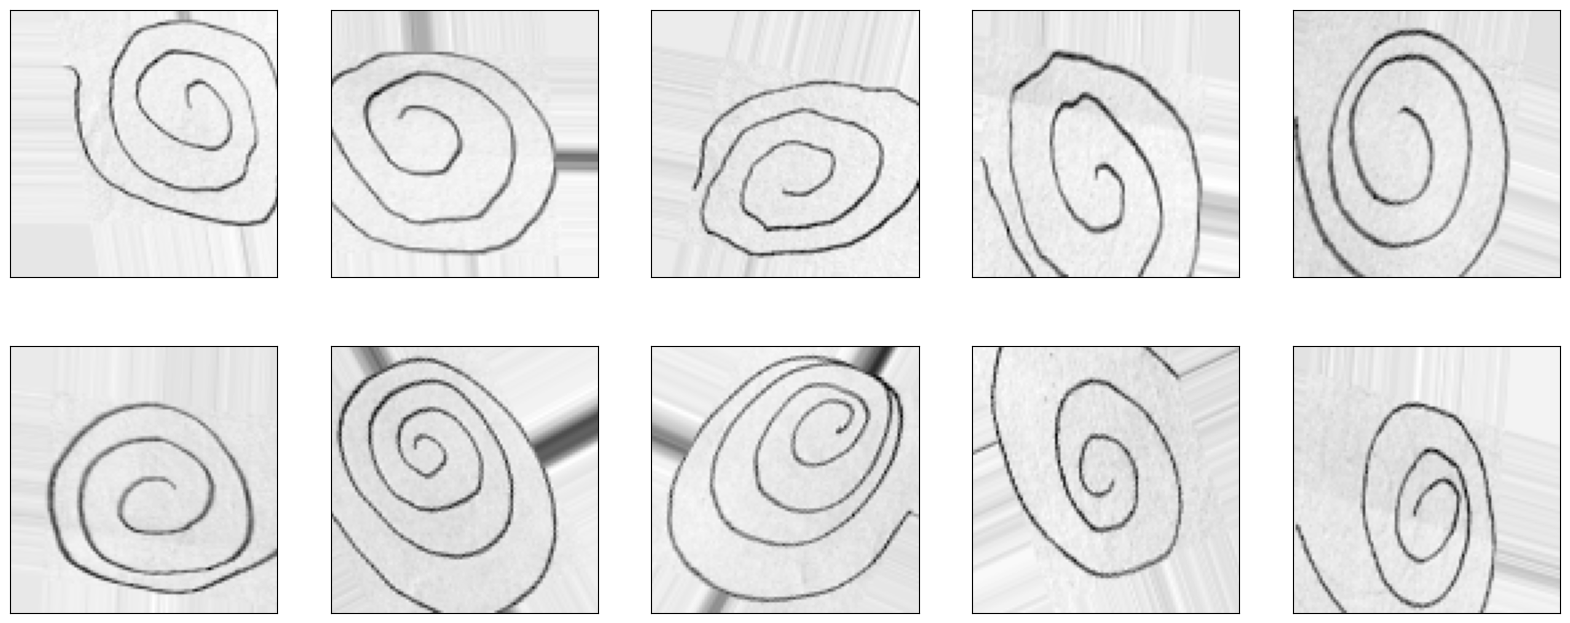

In [124]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=[0.9, 1.4],
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(X)

plt.figure(figsize=(20,8))

for imagen, etiqueta in datagen.flow(X, y, batch_size=10, shuffle=False):
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagen[i].reshape(100, 100), cmap="gray")
    break

In [118]:
# Aumento DATA
modeloCNN_AD = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

modeloCNN2_AD = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D(2, 2),
    
    Dropout(0.5),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [119]:
modeloCNN_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN2_AD.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [120]:
len(X) * .85 # 61
len(X) - 61 # 11

X_entrenamiento = X[:61]
X_validation = X[61:]

y_entrenamiento = y[:61]
y_validacion = y[61:]

In [121]:
datos_gen_entrenamiento = datagen.flow(X_entrenamiento, y_entrenamiento, batch_size=32)

In [122]:
modeloCNN_AD.fit(datos_gen_entrenamiento, epochs=100, batch_size=32, validation_data=(X_validacion, y_validacion), steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))), validation_steps= int(np.ceil(len(X_validation) / float(32))))

Epoch 1/100
2/2 [==============================] - 4s 735ms/step - loss: 2.6239 - accuracy: 0.4590 - val_loss: 0.2004 - val_accuracy: 1.0000
Epoch 2/100
2/2 [==============================] - 1s 233ms/step - loss: 0.8474 - accuracy: 0.5574 - val_loss: 0.7821 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 1s 221ms/step - loss: 0.6799 - accuracy: 0.5902 - val_loss: 0.6807 - val_accuracy: 1.0000
Epoch 4/100
2/2 [==============================] - 1s 252ms/step - loss: 0.6909 - accuracy: 0.5410 - val_loss: 0.8130 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 248ms/step - loss: 0.6773 - accuracy: 0.5902 - val_loss: 0.9879 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 249ms/step - loss: 0.6810 - accuracy: 0.5902 - val_loss: 1.0243 - val_accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 233ms/step - loss: 0.6810 - accuracy: 0.5902 - val_loss: 0.9902 - val_accuracy: 0.00

2/2 [==============================] - 0s 234ms/step - loss: 0.6786 - accuracy: 0.5902 - val_loss: 0.8663 - val_accuracy: 0.0000e+00
Epoch 58/100
2/2 [==============================] - 0s 239ms/step - loss: 0.6769 - accuracy: 0.5902 - val_loss: 0.8786 - val_accuracy: 0.0000e+00
Epoch 59/100
2/2 [==============================] - 0s 256ms/step - loss: 0.6771 - accuracy: 0.5902 - val_loss: 0.8731 - val_accuracy: 0.0000e+00
Epoch 60/100
2/2 [==============================] - 0s 220ms/step - loss: 0.6768 - accuracy: 0.5902 - val_loss: 0.8930 - val_accuracy: 0.0000e+00
Epoch 61/100
2/2 [==============================] - 0s 236ms/step - loss: 0.6788 - accuracy: 0.5902 - val_loss: 0.9176 - val_accuracy: 0.0000e+00
Epoch 62/100
2/2 [==============================] - 0s 235ms/step - loss: 0.6784 - accuracy: 0.5902 - val_loss: 0.9059 - val_accuracy: 0.0000e+00
Epoch 63/100
2/2 [==============================] - 0s 241ms/step - loss: 0.6764 - accuracy: 0.5902 - val_loss: 0.8880 - val_accuracy: 0.

In [107]:
modeloCNN2_AD.fit(datos_gen_entrenamiento, epochs=100, batch_size=32, validation_data=(X_validacion, y_validacion), steps_per_epoch=int(np.ceil(len(X_entrenamiento) / float(32))), validation_steps= int(np.ceil(len(X_validation) / float(32))))

Epoch 1/100
2/2 [==============================] - 5s 931ms/step - loss: 1.9484 - accuracy: 0.6066 - val_loss: 0.7101 - val_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 1s 286ms/step - loss: 1.1710 - accuracy: 0.4262 - val_loss: 0.2105 - val_accuracy: 1.0000
Epoch 3/100
2/2 [==============================] - 1s 293ms/step - loss: 0.9225 - accuracy: 0.4098 - val_loss: 0.5159 - val_accuracy: 1.0000
Epoch 4/100
2/2 [==============================] - 1s 300ms/step - loss: 0.7373 - accuracy: 0.4098 - val_loss: 0.7417 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 1s 291ms/step - loss: 0.6845 - accuracy: 0.5902 - val_loss: 0.7843 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 1s 263ms/step - loss: 0.6813 - accuracy: 0.5902 - val_loss: 0.7940 - val_accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 1s 263ms/step - loss: 0.6817 - accuracy: 0.5902 - val_loss: 0.8157 - val_accuracy: 0.00

2/2 [==============================] - 1s 297ms/step - loss: 0.6815 - accuracy: 0.5902 - val_loss: 0.9178 - val_accuracy: 0.0000e+00
Epoch 58/100
2/2 [==============================] - 1s 284ms/step - loss: 0.6805 - accuracy: 0.5902 - val_loss: 0.9229 - val_accuracy: 0.0000e+00
Epoch 59/100
2/2 [==============================] - 1s 294ms/step - loss: 0.6718 - accuracy: 0.5902 - val_loss: 0.8919 - val_accuracy: 0.0000e+00
Epoch 60/100
2/2 [==============================] - 1s 313ms/step - loss: 0.6786 - accuracy: 0.5902 - val_loss: 0.8445 - val_accuracy: 0.0000e+00
Epoch 61/100
2/2 [==============================] - 1s 287ms/step - loss: 0.6711 - accuracy: 0.5902 - val_loss: 0.8525 - val_accuracy: 0.0000e+00
Epoch 62/100
2/2 [==============================] - 1s 292ms/step - loss: 0.6739 - accuracy: 0.5902 - val_loss: 0.8842 - val_accuracy: 0.0000e+00
Epoch 63/100
2/2 [==============================] - 1s 275ms/step - loss: 0.6803 - accuracy: 0.5902 - val_loss: 0.8941 - val_accuracy: 0.

In [ ]:
modeloCNN_AD.save('espirales.h5')

In [123]:
# Guardar imatges a una carpeta i aumentar dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=[0.7, 1.4],
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(X)

# Directorio para almacenar las imágenes aumentadas
output_directory = 'aumentadas'
os.makedirs(output_directory, exist_ok=True)

# Número de imágenes aumentadas por cada imagen original
num_aumentadas_por_imagen = 10

# Iterar sobre las imágenes generadas
for imagen, etiqueta in datagen.flow(X, y, batch_size=num_aumentadas_por_imagen, shuffle=False):
    for i in range(num_aumentadas_por_imagen):
        # Guardar cada imagen aumentada en el directorio
        nombre_archivo = f"imagen_aumentada_{i}.png"
        ruta_guardado = os.path.join(output_directory, nombre_archivo)
        plt.imsave(ruta_guardado, imagen[i].reshape(100, 100), cmap="gray")

# Visualizar algunas imágenes aumentadas
plt.figure(figsize=(20, 8))
for i, filename in enumerate(os.listdir(output_directory)):
    if i >= 10:
        break  # Salir del bucle después de procesar las primeras 10 imágenes
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    img_path = os.path.join(output_directory, filename)
    img = plt.imread(img_path)
    plt.imshow(img, cmap="gray")

plt.show()



IndexError: index 2 is out of bounds for axis 0 with size 2